##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept*, ponieważ jest to punkt przecięcia się z osią $y$, gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego, potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix* i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



In [3]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model, metrics, model_selection
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

# Dane 'Scores.csv'

In [2]:
scores_df = pd.read_csv('SCORES.csv')
scores_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
scores_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
scores_df.shape

(25, 2)

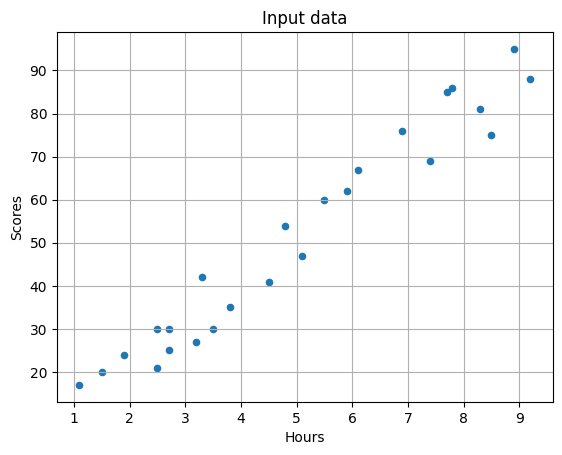

In [5]:
scores_df.plot.scatter(0, 1)
plt.title('Input data')
plt.grid()
plt.show()

In [6]:
# rozdział na WE/WY
y, X = scores_df.Scores.values.reshape(-1,1), scores_df.Hours.values.reshape(-1,1)

# rozdział na dane treningowe/testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [7]:
# wykonanie modelu regresji
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

### Atrybut coef_ z naszego modelu jest wektorem współczynników. W przypadku jednego predyktora odpowiada kątowi nachylenia prostej regresji. 

### Natomiast atrybut intercept_ odpowiada miejscu przecięcia z osią Y, gdy wszystkie predyktory są równe 0.

### Te parapetry służą nam do określenia w jaką stronę zmierza nasza regresja w zależności od predyktorów.

In [8]:
print('Coefficient:', reg.coef_)
print('Intercept:', reg.intercept_)

Coefficient: [[9.71054094]]
Intercept: [2.79419668]


### Porównanie wyników

In [9]:
data = {'y_test': y_test[:, 0], 'y_pred': y_pred[:, 0]}
comparsion = pd.DataFrame(data)
comparsion

,y_test,y_pred
0,81,83.391686
1,30,27.070549
2,21,27.070549
3,76,69.796929
4,62,60.086388
5,25,29.012657
6,42,34.838982
7,47,52.317955


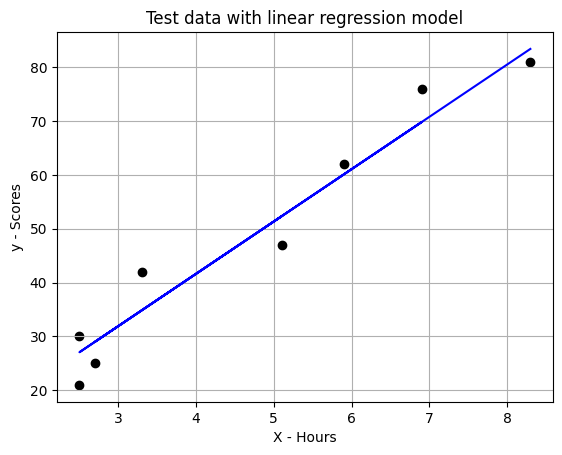

In [10]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue")
plt.grid()
plt.title('Test data with linear regression model')
plt.xlabel('X - Hours')
plt.ylabel('y - Scores')
plt.show()

### Walidacja uzyskanych predykcji

In [11]:
print('Średni błąd bezwzględny:')
print(sklearn.metrics.mean_absolute_error(y_test, y_pred), '\n')
print('Błąd średniokwadratowy:')
print(sklearn.metrics.mean_squared_error(y_test, y_pred), '\n')
print('Pierwiastek błędu średniokwadratowego')
print(sklearn.metrics.mean_squared_error(y_test, y_pred, squared=False))

Średni błąd bezwzględny:
4.499999999999998 

Błąd średniokwadratowy:
23.61945761415174 

Pierwiastek błędu średniokwadratowego
4.859985351228103


# Dane 'SBP.csv'

In [12]:
sbp_df = pd.read_csv('SBP.csv')
sbp_df.head()

,Age,SBP
0,60,117
1,61,120
2,74,145
3,57,129
4,63,132


In [13]:
sbp_df.describe()

,Age,SBP
count,19.000000,19.000000
mean,64.947368,129.421053
std,7.214751,13.454928
min,54.000000,111.000000
25%,60.500000,119.000000
50%,63.000000,129.000000
75%,68.500000,137.000000
max,79.000000,163.000000


In [14]:
sbp_df.shape

(19, 2)

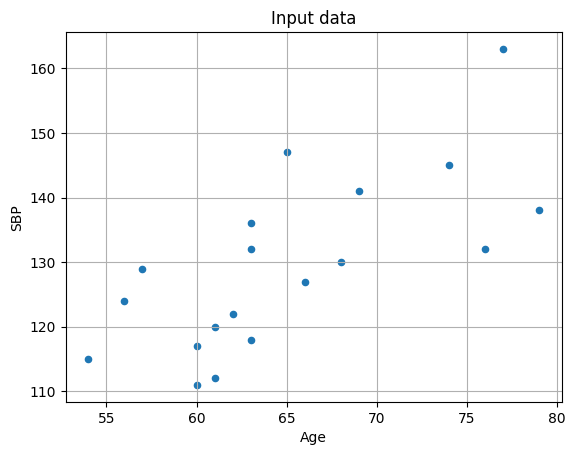

In [15]:
sbp_df.plot.scatter(0, 1)
plt.title('Input data')
plt.grid()
plt.show()

In [16]:
y, X = sbp_df.SBP.values.reshape(-1,1), sbp_df.Age.values.reshape(-1,1)

# rozdział na dane treningowe/testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [17]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [18]:
print('Coefficient:', reg.coef_)
print('Intercept:', reg.intercept_)

Coefficient: [[1.44882707]]
Intercept: [36.17936475]


In [19]:
data = {'y_test': y_test[:, 0], 'y_pred': y_pred[:, 0]}
comparsion = pd.DataFrame(data)
comparsion

,y_test,y_pred
0,117,123.108989
1,130,134.699606
2,132,146.290222
3,120,124.557816
4,136,127.455470
5,141,136.148433


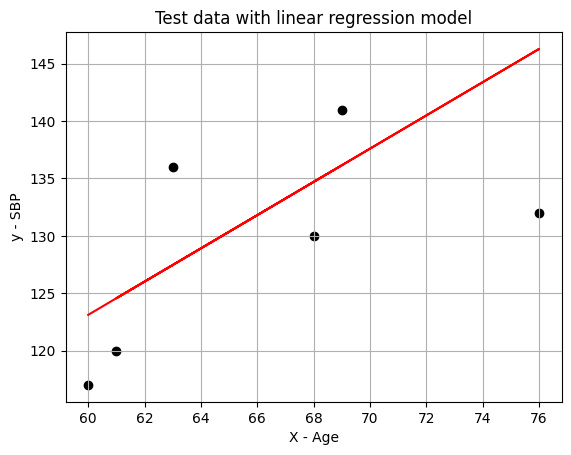

In [20]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="red")
plt.grid()
plt.title('Test data with linear regression model')
plt.xlabel('X - Age')
plt.ylabel('y - SBP')
plt.show()

### Walidacja uzyskanych wyników

In [21]:
print('Średni błąd bezwzględny:')
print(sklearn.metrics.mean_absolute_error(y_test, y_pred), '\n')
print('Błąd średniokwadratowy:')
print(sklearn.metrics.mean_squared_error(y_test, y_pred), '\n')
print('Pierwiastek błędu średniokwadratowego')
print(sklearn.metrics.mean_squared_error(y_test, y_pred, squared=False))

Średni błąd bezwzględny:
7.175454985814123 

Błąd średniokwadratowy:
63.48947834957053 

Pierwiastek błędu średniokwadratowego
7.968028510840717


## Wnioski:

Dla danych SBP.csv wynikowy model nie jest już tak dokładny, mamy bowiem wzrost wartości we wszystkich wyszczególnionych metrykach. 

Uzyskano gorszy rezultat ze względu na dużo większy rozrzut danych - im mniejsza zależność liniowa wśród naszych danych tym gorsze wyniki będzie osiągał model regresji liniowej.

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [22]:
petrol_df = pd.read_csv('PETROL.csv')
petrol_df.head()

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [23]:
petrol_df.describe()

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [24]:
petrol_df.shape

(48, 5)

In [25]:
petrol_df.corr()['Zuzycie_paliwa']

Podatek_paliwowy                  -0.451280
Sredni_przychod                   -0.244862
Utwardzone_autostrady              0.019042
Procent_ludnosci_z_prawem_jazdy    0.698965
Zuzycie_paliwa                     1.000000
Name: Zuzycie_paliwa, dtype: float64

In [26]:
# rozdział na WE/WY
formula = 'Zuzycie_paliwa ~ Procent_ludnosci_z_prawem_jazdy + Utwardzone_autostrady + Sredni_przychod + Podatek_paliwowy'
y, X = dmatrices(formula, petrol_df)

# rozdział na dane treningowe/testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [27]:
# wykonanie modelu regresji
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [28]:
print('Coefficient:', reg.coef_)
print('Intercept:', reg.intercept_)

Coefficient: [[ 0.00000000e+00  1.09340149e+03 -3.34506057e-04 -6.25830384e-02
  -3.22041196e+01]]
Intercept: [458.3133346]


In [29]:
print('Średni błąd bezwzględny:')
print(sklearn.metrics.mean_absolute_error(y_test, y_pred), '\n')
print('Błąd średniokwadratowy:')
print(sklearn.metrics.mean_squared_error(y_test, y_pred), '\n')
print('Pierwiastek błędu średniokwadratowego')
print(sklearn.metrics.mean_squared_error(y_test, y_pred, squared=False))

Średni błąd bezwzględny:
66.96555493293532 

Błąd średniokwadratowy:
8786.562613526574 

Pierwiastek błędu średniokwadratowego
93.73666632394483


## Wnioski:

Ponieważ dane nie są ze sobą mocno skorelowane, regresja liniowa nie daje najlepszych rezultatów. Być może lepsze rezultaty osiągnęlibyśmy mając dostęp do większej ilości danych lub wybierając inny model.

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W ten sposób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [30]:
heart_df = pd.read_csv('HEART.csv')
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [31]:
heart_df.describe()

,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [32]:
heart_df.corr(numeric_only=True)

,age,sex,cp,oldpeak,num
age,1.000000,0.013618,0.145826,0.177707,0.159315
sex,0.013618,1.000000,0.249875,0.118931,0.272781
cp,0.145826,0.249875,1.000000,0.353109,0.505864
oldpeak,0.177707,0.118931,0.353109,1.000000,0.545700
num,0.159315,0.272781,0.505864,0.545700,1.000000


In [33]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


In [34]:
# zmiania z '?' na NaN
for col in heart_df.columns:
    heart_df[col] = heart_df[col].replace('?', np.nan)

In [35]:
# Które kolumny usunąć?

heart_df.isna().sum() / heart_df.shape[0]

age           0.000000
sex           0.000000
cp            0.000000
trestbps      0.003401
chol          0.078231
fbs           0.027211
restecg       0.003401
thalach       0.003401
exang         0.003401
oldpeak       0.000000
slope         0.646259
ca            0.989796
thal          0.904762
num           0.000000
dtype: float64

In [36]:
# usuwam slope, ca i thal

heart_df = heart_df.drop(['slope', 'ca', 'thal'], axis=1)

In [37]:
# uzupełnianie pojedynczych wartości NaN
heart_df.fillna(method="ffill", inplace=True)

In [38]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,243,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,1
290,54,0,3,130,294,0,1,100,1,0.0,1
291,56,1,4,155,342,1,0,150,1,3.0,1
292,58,0,2,180,393,0,0,110,1,1.0,1


In [39]:
# metoda get_dummies()

dummies_cp = pd.get_dummies(heart_df.cp, prefix='cp', drop_first=True)
dummies_restecg = pd.get_dummies(heart_df.restecg, prefix='restecg', drop_first=True)
heart_df = heart_df.drop(['cp','restecg'],axis=1)

heart_df_dummies = pd.concat([heart_df, dummies_cp, dummies_restecg], axis=1)

heart_df_dummies.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'num       ', 'cp_2', 'cp_3', 'cp_4', 'restecg_1', 'restecg_2'],
      dtype='object')

#### Widać, że kolumna cp została podzielona na 3 inne, a restecg na 2 inne

### W tym momencie zauważyłem, że jakaś dobra duszyczka zamiast nazwy kolumny 'num' dała 'num' + milion spacji, co trzeba naprawić

In [40]:
heart_df_dummies = heart_df_dummies.rename(columns={'num       ': 'num'})

In [41]:
log_reg = linear_model.LogisticRegression()

In [42]:
X = heart_df_dummies.drop('num',axis=1)
y = heart_df_dummies['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)

In [43]:
log_reg.fit(X_train, y_train)

/home/tomasz/anaconda3/envs/tomaszwojcicki/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
y_pred = log_reg.predict(X_test)

In [45]:
print('Coefficient:', log_reg.coef_)
print('Intercept:', log_reg.intercept_)

Coefficient: [[-0.00203955  0.67747078 -0.00454742  0.00643417  0.81984158 -0.01867697
   0.91486302  1.08161413 -1.4044999  -0.25918966  0.62569633 -0.34866901
  -0.28337001]]
Intercept: [-0.32645734]


In [46]:
print('Średni błąd bezwzględny:')
print(sklearn.metrics.mean_absolute_error(y_test, y_pred), '\n')
print('Błąd średniokwadratowy:')
print(sklearn.metrics.mean_squared_error(y_test, y_pred), '\n')
print('Pierwiastek błędu średniokwadratowego')
print(sklearn.metrics.mean_squared_error(y_test, y_pred, squared=False))

Średni błąd bezwzględny:
0.22033898305084745 

Błąd średniokwadratowy:
0.22033898305084745 

Pierwiastek błędu średniokwadratowego
0.46940279403817725
